# **ASSIGNMENT 2: PROCESSING DATA SETS IN PYTHON**

N1__2063509__Alessandra Morales Vázquez  

N1__2055762__Alondra María Cruz Castillo

N1__2043031__Miranda Ortega Salinas

N1__1858323__Venancio Hernández Santiago            

N1__1912265__Stephanie Fernanda Vera Treviño

### **Part 1. Data Loading and Exploration**


In [1]:
#Load the libraries that are needed
import numpy as np
import pandas as pd
import kagglehub
import os #access files that are on a specific carpet

In [2]:
# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

#Check if the archives are downloaded
print(os.listdir(path) )

file_path = path + "/diabetes.csv"
df = pd.read_csv(file_path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database
['diabetes.csv']


In [3]:
#Display a few rowsof the data set
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [4]:
#Identifiy null or inconsistent values
#glucose, bloodPressure, SkinThickness, insulin and BMI
print('Null Values: ')
print(df.isnull().sum())

print()
print('Inconsistent values: ')
columns = ['Glucose', 'BloodPressure', 'BMI']
for col in columns:
    print(f"{col}: {(df[col] == 0).sum()} inconsistent values")

Null Values: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Inconsistent values: 
Glucose: 5 inconsistent values
BloodPressure: 35 inconsistent values
BMI: 11 inconsistent values


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### **Part 2. Data Cleaning and Normalization**

In [6]:
#Replacing zero values with median
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zero:
  median = df[col].median()
  df[col] = df[col].replace(0, median)
print(df.head(8), '\n')

for col in columns_with_zero:
    print(f"{col}: {(df[col] == 0).sum()} zeros remaining")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   
5            5      116             74             23     30.5  25.6   
6            3       78             50             32     88.0  31.0   
7           10      115             72             23     30.5  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  

In [7]:
# Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns] = scaler.fit_transform(df[df.columns])

print("Normalized Dataset:")
print(df_scaled.head())

Normalized Dataset:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.019832  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.019832  0.171779   
2     0.470588  0.896774       0.408163       0.173913  0.019832  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0  


### **Part 3. Data Visualization**

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


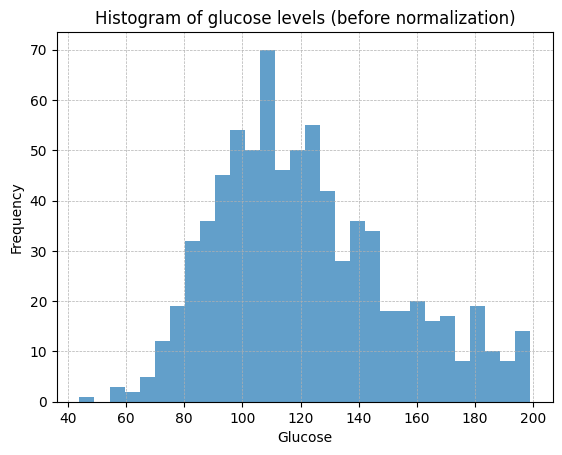

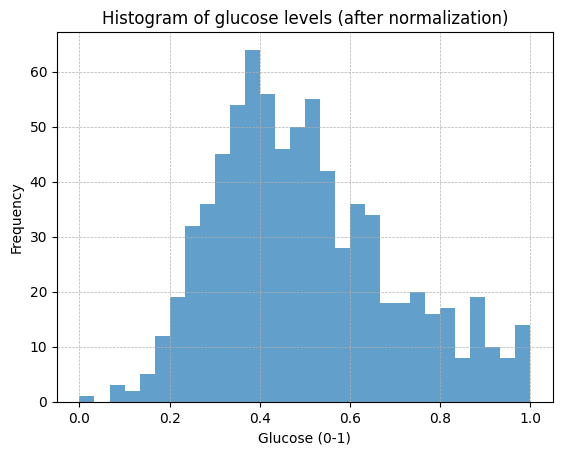

/tmp/ipython-input-1612745538.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["BloodPressure"].dropna(), labels=["BloodPressure"])


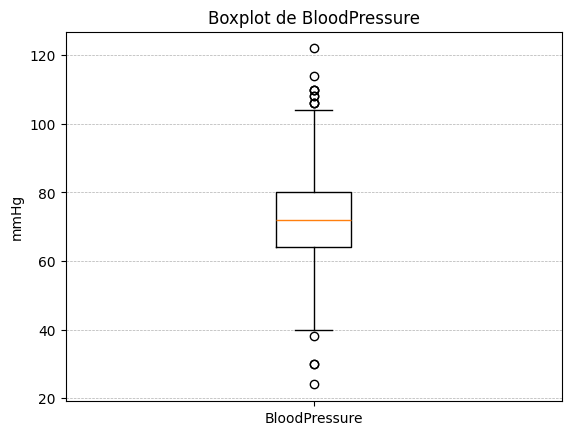

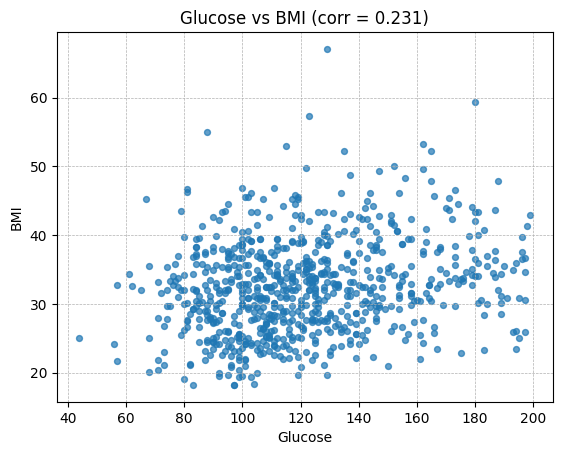

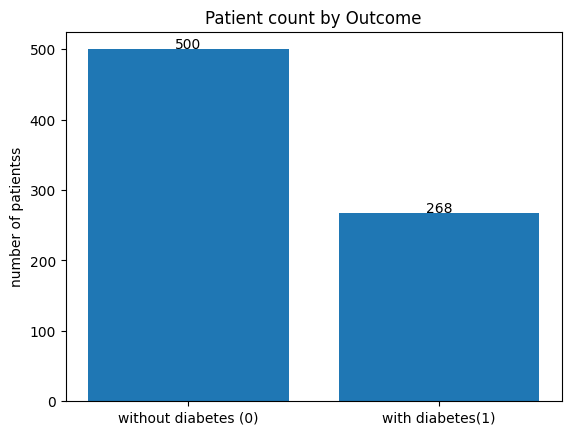

In [8]:
import os
import pandas as pd
import kagglehub
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
file_path = path + "/diabetes.csv"
df = pd.read_csv(file_path)


columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


for col in columns_with_zero:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns] = scaler.fit_transform(df[df.columns])

#Histogram of glucose levels before and after normalization.
plt.figure()
plt.hist(df["Glucose"], bins=30, alpha=0.7)
plt.title("Histogram of glucose levels (before normalization)")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

plt.figure()
plt.hist(df_scaled["Glucose"], bins=30, alpha=0.7)
plt.title("Histogram of glucose levels (after normalization)")
plt.xlabel("Glucose (0-1)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# 2) Boxplot BloodPressure
plt.figure()
plt.boxplot(df["BloodPressure"].dropna(), labels=["BloodPressure"])
plt.title("Boxplot de BloodPressure")
plt.ylabel("mmHg")
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.show()

# 3) Scatter plot between Glucose and BMI to analyze correlation.
corr = df[["Glucose", "BMI"]].corr().loc["Glucose", "BMI"]
plt.figure()
plt.scatter(df["Glucose"], df["BMI"], s=18, alpha=0.7)
plt.title(f"Glucose vs BMI (corr = {corr:.3f})")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# 4) Bar chart showing the number of patients with and without diabetes (Outcome).
counts = df["Outcome"].value_counts().sort_index()
plt.figure()
plt.bar(["without diabetes (0)", "with diabetes(1)"], counts.values)
plt.title("Patient count by Outcome")
plt.ylabel("number of patientss")
for i, v in enumerate(counts.values):
    plt.text(i, v + 1, str(v), ha="center")
plt.show()



### **Part 4. Questions**

**1. What impact do missing values have on data analysis?**
    
    The missing data is relatively common in almost all research and can present various problems. First, the absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false. Second, the lost data can cause bias in the estimation of parameters. Third, it can reduce the representativeness of the samples. Fourth, it may complicate the analysis of the study. Each of these distortions may threaten the validity of the trials and can lead to invalid conclusions.

**2. How can we detect and handle outliers in biomedical datasets?**
    
    DETECTION:
     * Visualizing data is often the simplest and most intuitive way to spot outliers. Common plots include boxplots, scatter plots, and histograms, which help visually detect extreme values.
     * Statistical techniques help us quantify outliers based on certain metrics, making it easier to set thresholds for detection. Some popular methods include: Z-core method and IQR method.
     * Algorithmic Techniques use machine learning and clustering methods to detect outliers, making them suitable for complex datasets with multiple features. Two of the most widely used algorithmic techniques for outlier detection are Isolation Forests and Local Outlier Factor (LOF).

    HANDLING:
     Once you have identified the outliers in a dataset, it is essential to handle these outliers with a dedicated strategy that aligns with your analysis goals. In general, we can remove or cap outlier values.

**3. What are some common causes of missing or incorrect data in biomedical studies?**

    Missing or incorrect data in biomedical studies stems from multiple factors, including poor study design (ambiguous forms, poorly defined protocols), human errors in manual data collection or entry, loss of participants to follow-up, lack of adherence or inaccurate self-reporting by subjects, degradation or improper handling of biological samples, technical laboratory failures (calibration errors, batch effects), and problems in data processing and management (coding errors, incorrect database merging). These issues compromise the validity of results and are mitigated through rigorous planning, standardized training, electronic data capture with validation checks, and continuous quality monitoring.

**4. How does normalizing data improve the performance of Machine Learning models?**
    
    Normalizing data significantly enhances machine learning performance by addressing critical issues stemming from features with differing scales; it ensures gradient-based algorithms like neural networks and linear models converge faster by creating a more spherical loss landscape, enables distance-based methods such as k-NN and k-Means to function correctly by ensuring all features contribute equally to distance calculations, improves the effectiveness of regularization by applying penalties uniformly to all coefficients, and enhances numerical stability for operations like matrix inversion. While tree-based models are immune to scaling, normalization is a vital preprocessing step for most other algorithms as it allows the model to learn the true underlying patterns in the data rather than being biased by arbitrary differences in feature magnitudes.

**5. Why is visualizing data an important step before applying Machine Learning models?**

    Visualizing data is a critical pre-modeling step because it allows for the detection of underlying patterns, relationships, and potential issues that are not obvious from raw statistics alone. It helps identify trends, correlations, and outliers that could skew model performance. Visualization is also essential for understanding the distribution of data, which informs whether scaling or transformations are needed, and for checking for class imbalances in classification tasks. Ultimately, it provides an intuitive gut check for assumptions, guides smarter feature engineering, and helps select the most appropriate algorithm, preventing wasted effort on models doomed to fail by inherent data flaws.

**6. Why is preprocessing critical when working with medical datasets?**
    
    Preprocessing is essential in medical datasets, as these often contain missing values, errors, and heterogeneous formats. Through cleaning, normalization, and feature selection, preprocessing ensures data consistency and reduces noise, while also addressing class imbalance to improve model performance. In addition, it plays a critical role in protecting patient privacy and mitigating potential biases, which is fundamental for producing reliable, ethical, and clinically meaningful results

**7. What ethical concerns should be considered when handling patient data?**
    
    When handling patient data, several ethical concerns need to be considered. First, privacy and confidentiality are critical, as medical information is highly sensitive and should only be accessible to authorized individuals. Closely tied to this is informed consent, meaning patients should know how their data will be used and agree to it. Data security is also essential, since breaches can cause harm not only through identity theft but also through stigmatization or discrimination. Another concern is anonymization and de-identification, ensuring that personal identifiers are removed so patients cannot be traced back from research datasets. Bias and fairness must be addressed, because using incomplete or skewed datasets can reinforce health inequalities or lead to unfair treatment recommendations. Finally, compliance with regulations such as HIPAA (in the U.S.) or GDPR (in Europe) is necessary, since these frameworks are designed to safeguard ethical handling of medical information.


### **References**

* 7.3. Preprocessing data. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/preprocessing.html

* IBM. (2022, September 29). What is data visualization? Think. https://www.ibm.com/think/topics/data-visualization?mhsrc=ibmsearch_a&mhq=data%20visualization Soni, P. (2024, November 11). How to

* Kang H. The prevention and handling of the missing data. Korean J Anesthesiol. 2013 May;64(5):402-6. doi: 10.4097/kjae.2013.64.5.402. Epub 2013 May 24. PMID: 23741561; PMCID: PMC3668100.

* Detect outliers in Python: A comprehensive guide. Train in Data’s Blog. https://www.blog.trainindata.com/detect-outliers-in-python/